# Исследование объявлений о продаже квартир

**Описание проекта:**   
Проект направлен на исследование факторов, влияющих на ценообразование на рынке недвижимости в Санкт-Петербурге.  
В ходе проекта будут выявлены ключевые параметры, которые определяют стоимость квартир.  
Полученные знания будут использованы для создания системы, которая будет отслеживать аномалии и предупреждать о возможных случаях мошенничества.

**Автор:**  
Григорьев Павел   

**Цель:**    
Выявить ключевые параметры, определяющие стоимость квартир, и разработать рекомендации для создания системы мониторинга,   
которая поможет выявлять аномалии в ценах и предупреждать о мошенничестве на рынке недвижимости.

**Источники данных:**  
Данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

**Условия проведения анализа днных:**  


>указываем временной интервал выборки  
>Например, 'для анализ будут использоваться данные за год с 1 июня 2017 по 31 мая 2018 года'

>Например, 'для анализ будут использоваться данные за год с 1 июня 2017 по 31 мая 2018 года'

**Главные выводы:**   
тут помещаем самое главное из общего вывода, примерно до полустраницы, чтобы не было сильно много и при этом указать все главные выводы
Будет идеально, елси выводы на похожие темы будут рядом, то есть елси мы имеем несколько выводов о доходе, то лушче поместить их рядом
- Женщины чаще возвращают кредит, чем мужчины.
- Долги присутствуют у людей с разным доходом.


**Аномалии и особенности в данных:**
- В датафрейме есть строки дубликаты. 54 строки. Меньше 1 % от всего датафрейма.  
- В столбце с количеством детей есть отрицательные значения. 47 штук. Меньше 1 процента от всего датафрейма. Также есть клиенты с 20 детьми.

**Рекомендации:**  
- Добавить контроль данных, чтобы не дублировались значения с разными регистрами в колонке с образованием.
- Добавить уникальный идентификатор клиента, чтобы избежать дублирования строк.


**Оглавление**


## Загрузка библиотек

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import plotly.express as px
import pagri_data_tools  # type: ignore

## Описание и изучение данных

### Описание данных


По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных.  
Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

- airports_nearest - расстояние до ближайшего аэропорта в метрах (м)
- balcony - число балконов
- ceiling_height - высота потолков (м)
- cityCenters_nearest - расстояние до центра города (м)
- days_exposition - сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition - дата публикации
- floor - этаж
- floors_total - всего этажей в доме
- is_apartment - апартаменты (булев тип)
- kitchen_area - площадь кухни в квадратных метрах (м²)
- last_price - цена на момент снятия с публикации
- living_area - жилая площадь в квадратных метрах(м²)
- locality_name - название населённого пункта
- open_plan - свободная планировка (булев тип)
- parks_around3000 - число парков в радиусе 3 км
- parks_nearest - расстояние до ближайшего парка (м)
- ponds_around3000 - число водоёмов в радиусе 3 км
- ponds_nearest - расстояние до ближайшего водоёма (м)
- rooms - число комнат
- studio - квартира-студия (булев тип)
- total_area - площадь квартиры в квадратных метрах (м²)
- total_images - число фотографий квартиры в объявлении

### Изучение данных

#### Изучение переменных

Оставим тип float, так как у нас пропуски в данных и мы не можем преобразовать нужные столбцы в int

In [2]:
dtype = {'is_apartment': 'category', 'studio': 'category', 'open_plan': 'category'}
df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', dtype=dtype, sep='\t'
                , parse_dates=['first_day_exposition'], date_format='%Y-%m-%dT%H:%M:%S')
df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}, inplace=True)
df.sample(5, random_state=7)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
6029,7,4200000.0,42.00,2017-12-05,2,2.58,5.0,28.5,5,NaN,...,5.00,NaN,Санкт-Петербург,36416.0,9534.0,2.0,446.0,3.0,459.0,18.0
21836,7,3950000.0,45.00,2015-06-10,2,NaN,9.0,28.0,7,NaN,...,7.00,0.0,Санкт-Петербург,27880.0,12138.0,1.0,638.0,1.0,593.0,437.0
5698,7,450000.0,42.00,2017-07-31,2,NaN,1.0,23.0,1,NaN,...,5.80,NaN,городской посёлок Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.0
9402,11,4900000.0,55.00,2017-06-19,2,NaN,14.0,32.0,14,NaN,...,8.50,2.0,Санкт-Петербург,39931.0,12834.0,0.0,NaN,0.0,NaN,15.0
2519,6,3511000.0,39.41,2018-08-07,1,2.65,27.0,NaN,12,NaN,...,11.28,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,60.0


Изучим каждую колонку отдельно

In [364]:
gen = pagri_data_tools.my_info_gen(df)
next(gen)

Rows,Features,RAM (Mb),Duplicates,Dupl (sub - origin)
23 699,22,6,---,---


**Наблюдения:**
- Полных дубликатов в датафрейме нет

In [365]:
next(gen)

First date,2014-11-27 00:00:00,,Zeros,---,,Years missing,0%,
Last date,2019-05-03 00:00:00,,Missing,---,,Months missing,0%,
Values,23 699 (100%),,Distinct,1 491 (6%),,Weeks missing,0%,
RAM (Mb),<1 Mb,,Duplicates,22 208 (94%),,Days missing,8%,


**Наблюдения:**
- В колонке с датой пропущенных значений нет.
- Нет пропущенных годов и месяцев.
- 8 процентов дней пропущено

Values,23 699 (100%),,Max,50,,Avg,9.86,,10 (8%)
Missing,---,,95%,20,,Mode,10,,9 (7%)
Distinct,38 (<1%),,75%,14,,Range,50,,20 (7%)
Duplicates,23 661 (99.8%),,Median,9,,iQR,8,,8 (7%)
Zeros,1 059 (4%),,25%,6,,std,5.68,,7 (6%)
Negative,---,,5%,1,,kurt,-0.34,,6 (6%)
RAM (Mb),<1 Mb,,Min,0,,skew,0.26,,11 (6%)

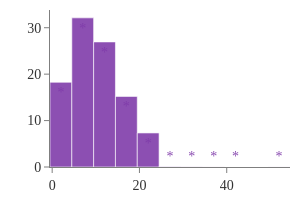

In [366]:
next(gen)

**Наблюдения:**
- В колонке с количеством фотографий пропусков нет
- 4 процента записей с нулями, это нормально, поскольку у части объявлений нет изображений.
- Максимальное количество фотографиий 50. Это многовато, нужно будет это проверить.
- Медианное значение 9, похоже на правду.
- 7 процентов записей имеют 20 фотографий. 

Values,23 699 (100%),,Max,763 000 000,,Avg,6 541 548.77,,4 500 000 (1%)
Missing,---,,95%,15 300 000,,Mode,4 500 000,,3 500 000 (1%)
Distinct,2 978 (13%),,75%,6 800 000,,Range,762 987 810,,4 300 000 (1%)
Duplicates,20 721 (87%),,Median,4 650 000,,iQR,3 400 000,,4 000 000 (1%)
Zeros,---,,25%,3 400 000,,std,10 887 013.27,,4 200 000 (1%)
Negative,---,,5%,1 870 000,,kurt,1277.68,,3 600 000 (1%)
RAM (Mb),<1 Mb,,Min,12 190,,skew,25.80,,3 300 000 (1%)

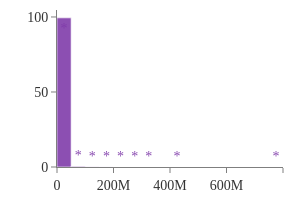

In [367]:
next(gen)

**Наблюдения:**
- В цене есть выбросы.
- Минимальное занчение 12 190 и максимальное значение 763 млн выглядят подозрительно.

Values,23 699 (100%),,Max,900,,Avg,60.35,,45 (2%)
Missing,---,,95%,116,,Mode,45,,42 (2%)
Distinct,2 182 (9%),,75%,69.9,,Range,888,,60 (1%)
Duplicates,21 517 (91%),,Median,52,,iQR,29.9,,31 (1%)
Zeros,---,,25%,40,,std,35.65,,44 (1%)
Negative,---,,5%,31,,kurt,47.52,,40 (1%)
RAM (Mb),<1 Mb,,Min,12,,skew,4.77,,43 (1%)

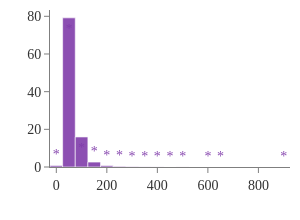

In [368]:
next(gen)

**Наблюдения:**
- Максимальная площадь в 900 квадратов многовато.
- Также нужно проверить площадь 12 квадратов

Values,23 699 (100%),,Max,19,,Avg,2.07,,1 (34%)
Missing,---,,95%,4,,Mode,1,,2 (34%)
Distinct,17 (<1%),,75%,3,,Range,19,,3 (25%)
Duplicates,23 682 (99.9%),,Median,2,,iQR,2,,4 (5%)
Zeros,197 (1%),,25%,1,,std,1.08,,5 (1%)
Negative,---,,5%,1,,kurt,8.69,,0 <1%
RAM (Mb),<1 Mb,,Min,0,,skew,1.52,,6 <1%

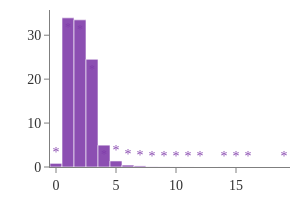

In [369]:
next(gen)

**Наблюдения:**
- Есть квартиры с 0 комнат, возможно так обозначили студии.
- Максимальное количество комнад 19 нужно изучить.
- Треть квартир с 1 комнатой и треть квартир с двумя комнатами. Четверть с 3 комнатами.
- Квартир с 4 и более комант около 6 процентов.

Values,14 504 (61%),,Max,100,,Avg,2.77,,2.5 (24%)
Missing,9 195 (39%),,95%,3.3,,Mode,2.5,,2.6 (11%)
Distinct,183 (1%),,75%,2.8,,Range,99,,2.7 (11%)
Duplicates,23 515 (99.2%),,Median,2.65,,iQR,0.28,,3 (8%)
Zeros,---,,25%,2.52,,std,1.26,,2.8 (7%)
Negative,---,,5%,2.5,,kurt,2627.14,,2.55 (7%)
RAM (Mb),<1 Mb,,Min,1,,skew,41.71,,2.75 (6%)

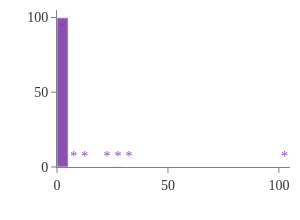

In [370]:
next(gen)

**Наблюдения:**
- В высоте потолков пропуски (39 процентов)
- Явный выбрас 100.

Values,23 613 (99.6%),,Max,60,,Avg,10.67,,5 (25%)
Missing,86 (<1%),,95%,25,,Mode,5,,9 (16%)
Distinct,36 (<1%),,75%,16,,Range,59,,16 (6%)
Duplicates,23 662 (99.8%),,Median,9,,iQR,11,,12 (6%)
Zeros,---,,25%,5,,std,6.6,,4 (5%)
Negative,---,,5%,4,,kurt,0.04,,10 (5%)
RAM (Mb),<1 Mb,,Min,1,,skew,0.94,,25 (5%)

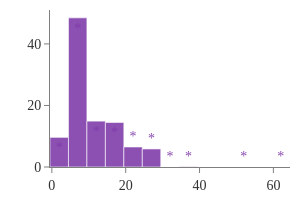

In [371]:
next(gen)

**Наблюдения:**
- В количестве этажей есть пропуски (меньше 1 процента)
- Максимальное количество этаже 60 нужно проверить.
- Больше всего пятиэтажек (25 процентов)

Values,21 796 (92%),,Max,409.7,,Avg,34.46,,18 (4%)
Missing,1 903 (8%),,95%,69,,Mode,18,,17 (3%)
Distinct,1 782 (8%),,75%,42.3,,Range,407.7,,30 (3%)
Duplicates,21 916 (92%),,Median,30,,iQR,23.7,,16 (2%)
Zeros,---,,25%,18.6,,std,22.03,,20 (2%)
Negative,---,,5%,15.2,,kurt,31.36,,28 (2%)
RAM (Mb),<1 Mb,,Min,2,,skew,3.91,,31 (2%)

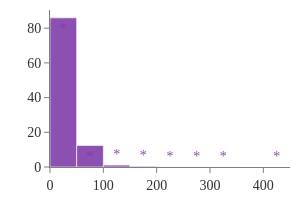

In [372]:
next(gen)

**Наблюдения:**
- В жилой площади 8 процентов пропусков.
- Нужно проверить минимальную и максимальную жилую площади.

Values,23 699 (100%),,Max,33,,Avg,5.89,,2 (14%)
Missing,---,,95%,16,,Mode,2,,3 (13%)
Distinct,33 (<1%),,75%,8,,Range,32,,1 (12%)
Duplicates,23 666 (99.9%),,Median,4,,iQR,6,,4 (12%)
Zeros,---,,25%,2,,std,4.89,,5 (11%)
Negative,---,,5%,1,,kurt,2.33,,6 (6%)
RAM (Mb),<1 Mb,,Min,1,,skew,1.55,,7 (5%)

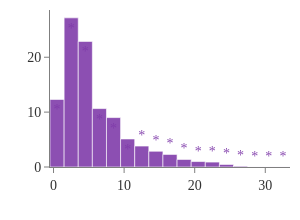

In [373]:
next(gen)

**Наблюдения:**
- Больше всего квартир с 1 по 5 этаж. Это логично, учитывая, что у нас больше всего пятиэтажек.

Values,21 421 (90%),,Max,112,,Avg,10.57,,6 (6%)
Missing,2 278 (10%),,95%,20,,Mode,6,,10 (6%)
Distinct,971 (4%),,75%,12,,Range,110.7,,8 (5%)
Duplicates,22 727 (96%),,Median,9.1,,iQR,5,,9 (5%)
Zeros,---,,25%,7,,std,5.91,,7 (5%)
Negative,---,,5%,5.5,,kurt,33.76,,11 (4%)
RAM (Mb),<1 Mb,,Min,1.3,,skew,4.21,,12 (3%)

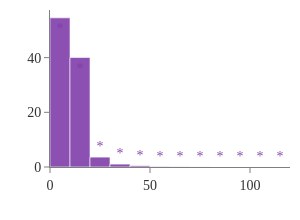

In [374]:
next(gen)

**Наблюдения:**
- В площади кухни 10 процентов пропусков.  
- Нужно проверить опять же максимальные и минимальные кухонные площади.

Values,12 180 (51%),,Max,5,,Avg,1.15,,1 (34%)
Missing,11 519 (49%),,95%,2,,Mode,1,,0 (31%)
Distinct,6 (<1%),,75%,2,,Range,5,,2 (30%)
Duplicates,23 692 (99.9%),,Median,1,,iQR,2,,5 (2%)
Zeros,3 758 (16%),,25%,0,,std,1.07,,4 (2%)
Negative,---,,5%,0,,kurt,2.51,,3 <1%
RAM (Mb),<1 Mb,,Min,0,,skew,1.24,,nan

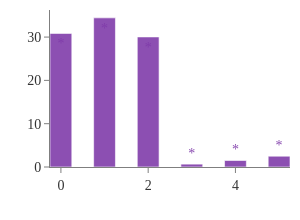

In [375]:
next(gen)

**Наблюдения:**
- В числе балконов 49 прцоентов пропусков. Скорее всего пропуски это отсутствие балкона.  
- Треть квартир без балковнов, также по трети квартир с 1 и 2 балконами.

Values,18 157 (77%),,Max,84 869,,Avg,28 793.67,,37 434 <1%
Missing,5 542 (23%),,95%,51 340,,Mode,37 434,,21 928 <1%
Distinct,8 275 (35%),,75%,37 273,,Range,84 869,,44 870 <1%
Duplicates,15 423 (65%),,Median,26 726,,iQR,18 688,,39 946 <1%
Zeros,1 (<1%),,25%,18 585,,std,12 630.88,,18 732 <1%
Negative,---,,5%,11 557.4,,kurt,-0.29,,37 407 <1%
RAM (Mb),<1 Mb,,Min,0,,skew,0.54,,39 140 <1%

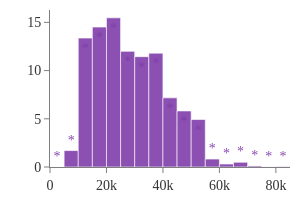

In [376]:
next(gen)

**Наблюдения:**
- В растоянии до ближайшего аэропорта 23 проента пропусков.
- 1 нулевое значение 

Values,18 180 (77%),,Max,65 968,,Avg,14 191.28,,8 460 <1%
Missing,5 519 (23%),,95%,31 671.6,,Mode,8 460,,20 802 <1%
Distinct,7 642 (32%),,75%,16 293,,Range,65 787,,10 720 <1%
Duplicates,16 056 (68%),,Median,13 098.5,,iQR,7 055,,20 444 <1%
Zeros,---,,25%,9 238,,std,8 608.39,,8 434 <1%
Negative,---,,5%,3 541,,kurt,4.36,,8 370 <1%
RAM (Mb),<1 Mb,,Min,181,,skew,1.67,,10 364 <1%

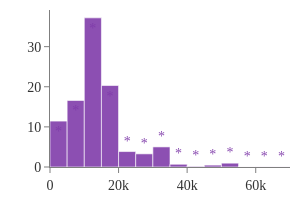

In [377]:
next(gen)

**Наблюдения:**
- В растоянии до центар города 23 процента пропусков. 

Values,18 181 (77%),,Max,3,,Avg,0.61,,0 (56%)
Missing,5 518 (23%),,95%,2,,Mode,0,,1 (31%)
Distinct,4 (<1%),,75%,1,,Range,3,,2 (10%)
Duplicates,23 694 (99.9%),,Median,0,,iQR,1,,3 (4%)
Zeros,10 106 (43%),,25%,0,,std,0.8,,nan
Negative,---,,5%,0,,kurt,0.87,,nan
RAM (Mb),<1 Mb,,Min,0,,skew,1.23,,nan

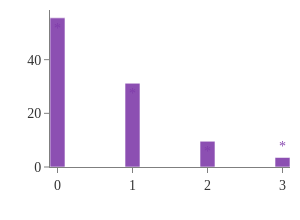

In [378]:
next(gen)

**Наблюдения:**
- В колонке с количеством парков рядом 23 процента пропусков.  

Values,8 079 (34%),,Max,3 190,,Avg,490.8,,441 <1%
Missing,15 620 (66%),,95%,968,,Mode,441,,173 <1%
Distinct,995 (4%),,75%,612,,Range,3 189,,392 <1%
Duplicates,22 703 (96%),,Median,455,,iQR,324,,456 <1%
Zeros,---,,25%,288,,std,342.32,,471 <1%
Negative,---,,5%,95.9,,kurt,12.22,,2 102 <1%
RAM (Mb),<1 Mb,,Min,1,,skew,2.72,,541 <1%

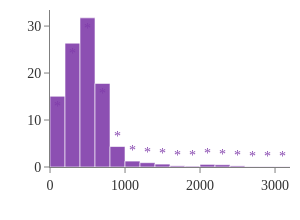

In [379]:
next(gen)

**Наблюдения:**
- В колонке с растоянием до ближайшего парка 66 процентов пропусков.  


Values,18 181 (77%),,Max,3,,Avg,0.77,,0 (50%)
Missing,5 518 (23%),,95%,3,,Mode,0,,1 (31%)
Distinct,4 (<1%),,75%,1,,Range,3,,2 (10%)
Duplicates,23 694 (99.9%),,Median,1,,iQR,1,,3 (8%)
Zeros,9 071 (38%),,25%,0,,std,0.94,,nan
Negative,---,,5%,0,,kurt,0.17,,nan
RAM (Mb),<1 Mb,,Min,0,,skew,1.07,,nan

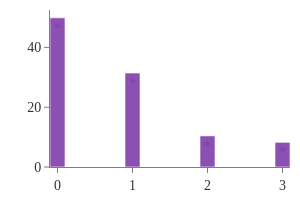

In [380]:
next(gen)

**Наблюдения:**
- В колонке с количеством прудов 23 прцоента пропусков, скорее всего это отсутствие парков.  

Values,9 110 (38%),,Max,1 344,,Avg,517.98,,427 <1%
Missing,14 589 (62%),,95%,976.55,,Mode,427,,454 <1%
Distinct,1 096 (5%),,75%,729,,Range,1 331,,153 <1%
Duplicates,22 602 (95%),,Median,502,,iQR,435,,433 <1%
Zeros,---,,25%,294,,std,277.72,,474 <1%
Negative,---,,5%,93,,kurt,-0.73,,564 <1%
RAM (Mb),<1 Mb,,Min,13,,skew,0.22,,303 <1%

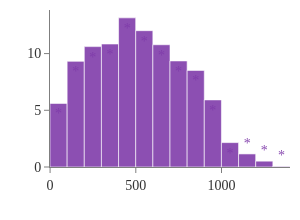

In [381]:
next(gen)

**Наблюдения:**
- В колоке с растоянием до ближайшего пруда 62 прцоента пропусков. 

Values,20 518 (87%),,Max,1 580,,Avg,180.89,,45.0 (4%)
Missing,3 181 (13%),,95%,647,,Mode,45.0,,60 (3%)
Distinct,1 141 (5%),,75%,232,,Range,1 579,,7 (1%)
Duplicates,22 557 (95%),,Median,95,,iQR,187,,30 (1%)
Zeros,---,,25%,45.0,,std,219.73,,90.0 <1%
Negative,---,,5%,9,,kurt,6.28,,4 <1%
RAM (Mb),<1 Mb,,Min,1,,skew,2.31,,3.0 <1%

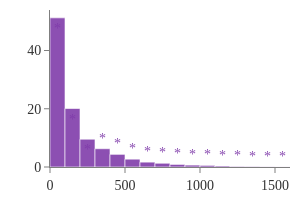

In [382]:
next(gen)

**Наблюдения:**
- В среднем объявление находится в продаже 180 дней, но из за выбросов оно не совсем точно описывает ситуацию.
- Лучше использовать медиану. Она составляет 95 дней. 
- Чаще всего объявления находятся в продаже 45 дней. 
- В колонке с количеством дней экспозиции 13 процентов пропусков. 
- Максимальное значение в 1580 дней похоже на выброс.

Values,2 775 (12%),,False (98%)
Missing,20 924 (88%),,True (2%)
Distinct,2 (<1%),,nan
Duplicated origin,23 696 (99.9%),,nan
Dupl (modify - origin),---,,nan
Empty,---,,nan
RAM (Mb),<1 Mb,,nan

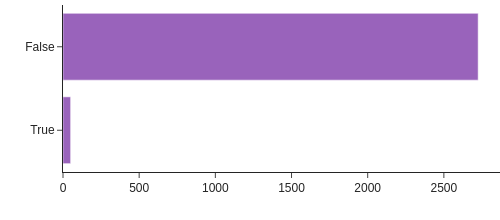

In [383]:
next(gen)

**Наблюдения:**
- В колоке с признаком является ли квартира аппартаментом 88 процентов пропусков. Скорее всего эти квартиры не являются аппартаментами.  

Values,23 699 (100%),,False (99%)
Missing,---,,True <1%
Distinct,2 (<1%),,nan
Duplicated origin,23 697 (99.9%),,nan
Dupl (modify - origin),---,,nan
Empty,---,,nan
RAM (Mb),<1 Mb,,nan

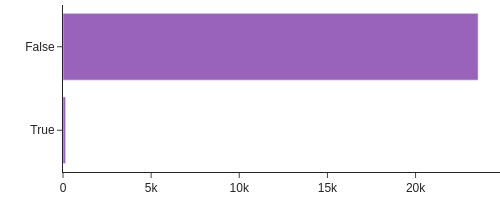

In [384]:
next(gen)

**Наблюдения:**
- Студий меньше 1 процента. 

Values,23 699 (100%),,False (100%)
Missing,---,,True <1%
Distinct,2 (<1%),,nan
Duplicated origin,23 697 (99.9%),,nan
Dupl (modify - origin),---,,nan
Empty,---,,nan
RAM (Mb),<1 Mb,,nan

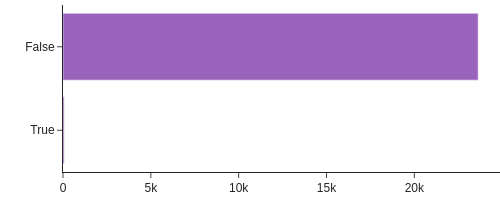

In [385]:
next(gen)

**Наблюдения:**
- Почти все квартиры с открытой планировкой.

Values,23 650 (99.8%),,Санкт-Петербург (66%)
Missing,49 (<1%),,посёлок Мурино (2%)
Distinct,364 (2%),,посёлок Шушары (2%)
Duplicated origin,23 334 (98%),,Всеволожск (2%)
Dupl (modify - origin),---,,Пушкин (2%)
Empty,---,,Колпино (1%)
RAM (Mb),2,,посёлок Парголово (1%)

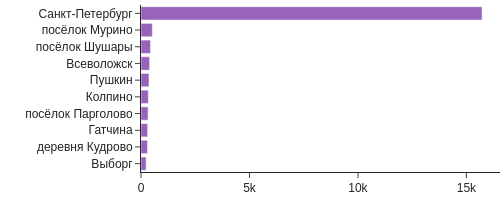

In [386]:
next(gen)

**Наблюдения:**
- В колонке с названием населенного пункта 49 пропущенных значений (меньше 1 процента)

#### Изучение дубликатов

Посмотрим на дубли во всем датафрейме

In [387]:
pagri_data_tools.check_duplicated(df)

'no duplicates'

Полных дубликатов у нас нет.

Посмотрим сколько у нас дублей в каждой колонке

In [388]:
series_duplicated = pagri_data_tools.find_columns_with_duplicates(df)

total_images,23661 (99.84%)
last_price,20721 (87.43%)
total_area,21517 (90.79%)
first_day_exposition,22208 (93.71%)
rooms,23682 (99.93%)
ceiling_height,23515 (99.22%)
floors_total,23662 (99.84%)
living_area,21916 (92.48%)
floor,23666 (99.86%)
is_apartment,23696 (99.99%)
studio,23697 (99.99%)


У нас нет столбцов, в которых данные должны быть уникальны, поэтому проверять на дубли нечего.

#### Изучение пропусков

Посмотрим на столбцы, в которых есть пропуски.

In [8]:
series_missed = pagri_data_tools.find_columns_with_missing_values(df)

ceiling_height,9195 (38.80%)
floors_total,86 (0.36%)
living_area,1903 (8.03%)
is_apartment,20924 (88.29%)
kitchen_area,2278 (9.61%)
balcony,11519 (48.61%)
locality_name,49 (0.21%)
airports_nearest,5542 (23.38%)
city_centers_nearest,5519 (23.29%)
parks_around3000,5518 (23.28%)
parks_nearest,15620 (65.91%)


У нас есть прпоуски в площадях. Посмотрим как они распределены.

Посмотрим есть ли пропуски сразу во всех площадях. 

In [390]:
df_na_in_both_columns = pagri_data_tools.check_na_in_both_columns(df, ['total_area', 'living_area', 'kitchen_area'])
df_na_in_both_columns.head()

0 (0.00%) rows with missings simultaneously in ['total_area', 'living_area', 'kitchen_area']


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Пропусков одновременно во всех столбцах с площадями нет.  
Посмотрим на строки датафрейма, где пропуски во всех площадях.  

In [391]:
series_missed['living_area'][['total_area', 'living_area', 'kitchen_area']].sample(10)

,total_area,living_area,kitchen_area
23517,46.0,NaN,NaN
10914,60.8,NaN,NaN
5827,30.0,NaN,NaN
10547,36.0,NaN,NaN
195,60.0,NaN,NaN
6392,24.0,NaN,NaN
2986,46.0,NaN,NaN
17538,48.0,NaN,NaN
20470,64.8,NaN,NaN
22015,70.4,NaN,NaN


У нас нет пропусков в общей площади. Поэтому мы сможем заменить значения пропусков в площади кухни и жилой площади.  

Можно заметить, что количество пропусков в колонке с количеством парков рядом, количеством прудов рядом совпадает,
растоянием до центра, растоянием до аэропорта примерно равны.
Выдвигаем гипотезу, что пропуски в одних и тех же строках в обоих столбцах.  

Посмотрим сколько пропусков в обоих колонках вместе

In [26]:
df_na_in_both_columns = pagri_data_tools.check_na_in_both_columns(df, ['airports_nearest', 'city_centers_nearest', 'parks_around3000', 'ponds_around3000'])
df_na_in_both_columns.head()

5518 (23.28%) rows with missings simultaneously in ['airports_nearest', 'city_centers_nearest', 'parks_around3000', 'ponds_around3000']


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30,2,NaN,5.0,30.00,5,NaN,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24,2,2.75,25.0,30.00,15,NaN,...,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19,1,NaN,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0


**Гипотеза подтвердилась**:
- Пропуски в одних и тех же строках в колонках с количеством парков рядом, количеством прудов рядом совпадает,
растоянием до центра, растоянием до аэропорта примерно равны

Посмотрим как распределены пропуски по категориям в строках, где прпоуски одновременно в этих столбцах.  

In [27]:
gen = pagri_data_tools.analyze_filtered_df_by_category(df, df_na_in_both_columns, 'df with na')

In [28]:
next(gen)

is_apartment,total,count,count_in_total_pct,count_in_sum_count_pct,total_in_sum_total_pct,diff_sum_pct
False,2725,621,22.8%,11.3%,11.5%,-0.2%
True,50,7,14.0%,0.1%,0.2%,-0.1%
nan,20924,4890,23.4%,88.6%,88.3%,0.3%


In [29]:
next(gen)

studio,total,count,count_in_total_pct,count_in_sum_count_pct,total_in_sum_total_pct,diff_sum_pct
False,23550,5461,23.2%,99.0%,99.4%,-0.4%
True,149,57,38.3%,1.0%,0.6%,0.4%


In [30]:
next(gen)

open_plan,total,count,count_in_total_pct,count_in_sum_count_pct,total_in_sum_total_pct,diff_sum_pct
False,23632,5488,23.2%,99.5%,99.7%,-0.3%
True,67,30,44.8%,0.5%,0.3%,0.3%


**Наблюдения:**
- Явных зависимостей от категорий не обнаружено

Изучим пропуски по категориям

In [18]:
pagri_data_tools.analyze_anomaly_by_category(df, series_missed, "by_category", "floors_total", "is_apartment")

is_apartment,total,count,count_in_total_pct,count_in_sum_count_pct,total_in_sum_total_pct,diff_sum_pct
False,2725,0,0.0%,0.0%,11.5%,-11.5%
True,50,0,0.0%,0.0%,0.2%,-0.2%
nan,20924,86,0.4%,100.0%,88.3%,11.7%


**Наблюдения:**
- Пропуски в количестве этажей совпадают с пропусками в признаке является ли квартира апартаментом.

In [19]:
pagri_data_tools.analyze_anomaly_by_category(df, series_missed, "by_category", "floors_total", "studio")

studio,total,count,count_in_total_pct,count_in_sum_count_pct,total_in_sum_total_pct,diff_sum_pct
False,23550,83,0.4%,96.5%,99.4%,-2.9%
True,149,3,2.0%,3.5%,0.6%,2.9%


**Наблюдения:**
- В количестве этаже пропуски зависят от признака является ли квартира студией.  
- Почти все пропуски в квартирах, которые не являются студиями, даже учитвая общее количество пропорций.

In [20]:
pagri_data_tools.analyze_anomaly_by_category(df, series_missed, "by_category", "kitchen_area", "studio")

studio,total,count,count_in_total_pct,count_in_sum_count_pct,total_in_sum_total_pct,diff_sum_pct
False,23550,2129,9.0%,93.5%,99.4%,-5.9%
True,149,149,100.0%,6.5%,0.6%,5.9%


**Наблюдения:**
- В студиях в поле площадь кухни одни пропуски.

In [21]:
pagri_data_tools.analyze_anomaly_by_category(df, series_missed, "by_category", "kitchen_area", "open_plan")

open_plan,total,count,count_in_total_pct,count_in_sum_count_pct,total_in_sum_total_pct,diff_sum_pct
False,23632,2211,9.4%,97.1%,99.7%,-2.7%
True,67,67,100.0%,2.9%,0.3%,2.7%


**Наблюдения:**
- В студиях в поле площадь кухни одни пропуски. 

#### Изучение выбросов

Сначала изучим потенциальные выбросы, которые мы выявили при изучении колонок.  

Изучим выброс с ценой 12190.0

In [410]:
df[df.last_price == 12190]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20,2,2.75,25.0,32.0,25,NaN,...,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


**Наблюдения**:  
- Ничего особенно не обнаружено.  
- Скорее всего ошиблись не поставили нули.

Посмотрим на выбросы с площадью квартиры. 

In [411]:
df[df.total_area > 500]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3117,19,140000000.0,631.0,2019-03-30,7,NaN,5.0,NaN,5,NaN,...,60.0,NaN,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
4237,1,50000000.0,517.0,2017-10-14,7,NaN,4.0,332.0,3,NaN,...,22.0,NaN,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6.0,409.0,3,NaN,...,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
8018,20,84000000.0,507.0,2015-12-17,5,4.45,7.0,301.5,7,True,...,45.5,1.0,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1078.0
12859,20,140000000.0,631.2,2019-04-09,7,3.90,4.0,322.3,4,NaN,...,19.5,1.0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
15651,20,300000000.0,618.0,2017-12-18,7,3.40,7.0,258.0,5,NaN,...,70.0,NaN,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0


**Наблюдения**:  
- Не похоже на выбросы. Цена большая, количество комнат болшое. Скорее всего просто большие дорогие квартиры. 

In [412]:
df[df.total_area < 15]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
17961,3,1400000.0,13.0,2017-12-03,1,2.60,9.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,14350.0,15945.0,0.0,NaN,1.0,185.0,410.0
19546,3,1850000.0,13.0,2019-03-11,1,3.40,5.0,NaN,2,False,...,NaN,NaN,Санкт-Петербург,24915.0,5483.0,1.0,644.0,0.0,NaN,24.0
19558,2,1686000.0,13.2,2018-12-17,1,NaN,5.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,19891.0,4165.0,1.0,361.0,1.0,155.0,19.0
19642,5,1190000.0,14.0,2018-07-29,1,NaN,5.0,11.0,1,NaN,...,2.0,NaN,Санкт-Петербург,9898.0,11122.0,0.0,NaN,0.0,NaN,4.0
19807,0,3800000.0,13.0,2018-07-04,1,NaN,5.0,10.0,3,NaN,...,NaN,NaN,Санкт-Петербург,21302.0,1242.0,1.0,592.0,3.0,27.0,9.0
19904,4,2400000.0,12.0,2017-07-19,1,2.55,5.0,10.0,2,NaN,...,NaN,NaN,Санкт-Петербург,21314.0,964.0,1.0,886.0,2.0,45.0,200.0


**Наблюдения**:  
- Не похоже на выбросы. Скорее всего это мелко нарезанные студии. Тем более этаж низкий.

Изучим выброс в высоте потолка.  

In [413]:
df[df.ceiling_height > 10].ceiling_height.value_counts()

,count
ceiling_height,
27.0,8
25.0,7
32.0,2
24.0,1
26.0,1
14.0,1
20.0,1
22.6,1
27.5,1


In [414]:
df[df.ceiling_height > 30]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3.0,53.0,2,NaN,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22336,19,9999000.0,92.4,2019-04-05,2,32.0,6.0,55.5,5,False,...,16.5,4.0,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN
22869,0,15000000.0,25.0,2018-07-25,1,100.0,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


**Наблюдения**:  
- Значения от 20 до 32 скорее всего поставили не там запятую.  
- А вот значения 10 и 100 странные.

Изучим выбросы в количестве этажей

In [415]:
df[df.floors_total > 35]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
397,15,5990000.0,54.0,2018-03-22,2,NaN,36.0,21.4,28,NaN,...,18.70,1.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,11.0
2253,12,3800000.0,45.5,2018-06-28,2,2.88,60.0,27.4,4,NaN,...,7.40,NaN,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0
5807,17,8150000.0,80.0,2019-01-09,2,27.00,36.0,41.0,13,NaN,...,12.00,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
11079,16,9200000.0,75.0,2019-02-22,2,2.70,36.0,40.0,29,NaN,...,12.00,2.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN
16731,9,3978000.0,40.0,2018-09-24,1,2.65,52.0,10.5,18,NaN,...,14.00,NaN,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0
16934,5,4100000.0,40.0,2017-10-17,1,1.75,37.0,17.4,5,NaN,...,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0


**Наблюдения**:  
- Так как в Санкт-Петербург	есть здания такой высоты, то нет оснований считать это выбросами. 

#### Изучение отрицательных значений

Изучаем отрицательные значения

In [416]:
series_negative = pagri_data_tools.find_columns_with_negative_values(df)

У нас нет отрицательных значений. 

#### Изучение нулевых значений

Изучаем нулевые значения

In [33]:
series_zeros = pagri_data_tools.find_columns_with_zeros_values(df)

total_images,1059 (4.47%)
rooms,197 (0.83%)
balcony,3758 (15.86%)
airports_nearest,1 (0.00%)
parks_around3000,10106 (42.64%)
ponds_around3000,9071 (38.28%)


Все кроме количества комнат и растояния до ближайщего аэропорта может быть нулями, поэтому удалим их из текущего изучения.  

In [34]:
series_zeros = series_zeros.loc[['rooms']]

Посмотрим отдельно на нулевое значение в растоянии до аэропорта.  

In [419]:
df[df.airports_nearest == 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000.0,34.7,2018-09-23,1,2.7,9.0,19.8,3,NaN,...,6.0,2.0,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


In [35]:
pagri_data_tools.analyze_anomaly_by_category(df, series_zeros, "value_counts", "rooms")

Value counts in rooms (0.83%)


,count
rooms,
0,197


Выдвинем гипотезу, что 0 комнат у студий и однокомнатных.  
Проверим гипотезу по полощади.  
Предположим, что площадь студий и однокомнатных квартир составляет не более 40 м2.

Посмотрим на выборку из датафрейма

In [36]:
series_zeros['rooms'][['last_price', 'total_area', 'living_area', 'kitchen_area', 'studio', 'open_plan']].query('total_area > 40')

,last_price,total_area,living_area,kitchen_area,studio,open_plan
3458,7400000.0,73.60,50.0,NaN,True,False
7237,2999000.0,42.63,25.7,NaN,False,True
10008,5050000.0,44.20,32.2,NaN,True,False
13613,8100000.0,58.40,33.0,NaN,True,False
15319,5970000.0,43.30,28.2,NaN,True,False
16130,5000000.0,42.10,30.0,NaN,True,False
19392,71000000.0,371.00,NaN,NaN,False,True
20082,16300000.0,98.40,60.5,NaN,True,False
21227,8200000.0,71.00,68.0,NaN,True,False


**Наблюдения:**  
- Видим, что почти все квартиры с 0 комнат имеют площадь до 40 кв. 
- 2 кваритры имеют открытую планировку  
- Можно будет заменить 0 на 1.

In [37]:
pagri_data_tools.analyze_anomaly_by_category(df, series_zeros, "by_category", "rooms", 'studio')

studio,total,count,count_in_total_pct,count_in_sum_count_pct,total_in_sum_total_pct,diff_sum_pct
False,23550,59,0.3%,29.9%,99.4%,-69.4%
True,149,138,92.6%,70.1%,0.6%,69.4%


**Наблюдения**:  
- Большая часть квартир с нулем комнат являются студиями.

### Промежуточный вывод

## Предобработка данных

### Выбор нужных столбцов для дальнейшей работы

Сохраним исходный датафрейм в переменную df_origin, чтобы была возможность вернуться к нему


In [424]:
df_origin = df.copy()

### Обработка выбросов

После изучения данных отрицательные значения не обнаружены, но есть колонки с нулевыми занчениями, где их быть не должно.  

Посмотрим где у нас нулевые значения

In [425]:
pagri_data_tools.check_zeros_value_in_df(df)

,zeros
total_images,1059 (4.5%)
rooms,197 (0.8%)
balcony,3758 (15.9%)
airports_nearest,1 (0.0%)
parks_around3000,10106 (42.6%)
ponds_around3000,9071 (38.3%)


Нам нужно обработать нули в количестве комнат и в растоянии до аэропорта. 

In [426]:
df[df.airports_nearest == 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000.0,34.7,2018-09-23,1,2.7,9.0,19.8,3,NaN,...,6.0,2.0,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


Так как это всего одна запись и точно восстановить расстояние невозможно, то лучше удалить ее.  

In [427]:
df.shape[0]

23699

In [428]:
df = df[df.airports_nearest != 0]

In [429]:
df.shape[0]

23698

Обработаем нулевые значения в количестве комнат.

Так как мы выяснили, что 0 комнат указано у студий и в открытой планеровке, либо у квартир с площадью до 40 кв.,  
то заменим 0 на 1.  

In [430]:
tt = df.copy()

In [431]:
tt.rooms = tt.rooms.apply(lambda x: 1 if x == 0 else x)

In [432]:
df.loc[:, 'rooms'] = df.rooms.apply(lambda x: 1 if x == 0 else x)

Убедимся, что у нас не осталось нулевых и отрицательных значений где их быть не должно.  

In [433]:
pagri_data_tools.check_negative_value_in_df(df)

,negative


In [434]:
pagri_data_tools.check_zeros_value_in_df(df)

,zeros
total_images,1058 (4.5%)
balcony,3758 (15.9%)
parks_around3000,10105 (42.6%)
ponds_around3000,9070 (38.3%)


У нас в цене есть одна запись со значением 12190.
Скорее всего не поставили нули, но сложно определить сколько именно нулей не поставили.  
Так как это всего 1 запись, то удалим ее. 

In [435]:
df.shape[0]

23698

In [436]:
df = df[df.last_price != 12190]

In [437]:
df.shape[0]

23697

Обработаем выбросы в высоте потолков. 

Будем считать, что высота потолков больше 5 метров явялется маловероятным.  
Посмотрим сколько у нас записей с высотой потолка больше 5 метров.  

In [438]:
pagri_data_tools.count_share(df.ceiling_height > 5)

'36 (0.2%)'

Так как их очень мало и мы не можем обработать эти выбросы, то удалим их.  

In [439]:
df.shape[0]

23697

In [440]:
df[df.ceiling_height > 5].shape[0]

36

In [441]:
df = df[~(df.ceiling_height > 5)]

In [442]:
df.shape[0]

23661

### Обработка пропусков

Посмотрим где у нас пропуски.  

In [461]:
pagri_data_tools.check_missed_value_in_df(df)

,missed
ceiling_height,9118 (38.7%)
balcony,11468 (48.6%)
locality_name,48 (0.2%)
airports_nearest,5522 (23.4%)
city_centers_nearest,5499 (23.3%)
parks_around3000,5498 (23.3%)
parks_nearest,15546 (65.9%)
ponds_around3000,5498 (23.3%)
ponds_nearest,14529 (61.6%)
days_exposition,3164 (13.4%)


Мы выяснили, что у нас пропуски в столбцах 'airports_nearest', 'city_centers_nearest', 'parks_around3000', 'ponds_around3000'  
в одних и тех же строчках.    
Так как количество пропусков болшое, то заменять их нельзя.  
Поэтому оставим их как есть. 

Пропуски в высоте потолков мы обрабатывать не можем, так как их сильно много.  

Пропуски в количестве этажей удалим, так как их мало.  

In [444]:
df.shape[0]

23661

In [445]:
df = df.dropna(subset=['floors_total'])

In [446]:
df.shape[0]

23575

Пропуски в жилой площади и в площади кухни обработаем с помощью коэффициентов отношения площадей.  
При этом расчитывать будем с учетом количества комнат, чтобы было точнее.  

In [447]:
df[['total_area', 'living_area', 'rooms', 'kitchen_area', 'balcony']].sample(5)

,total_area,living_area,rooms,kitchen_area,balcony
13287,35.0,19.1,1,8.2,NaN
17048,45.9,30.8,2,6.5,NaN
23297,48.2,42.2,2,6.0,1.0
18227,72.6,36.6,2,NaN,0.0
18195,61.3,33.4,2,11.5,0.0


In [448]:
df.shape[0]

23575

In [449]:
kitchen_ratio = df.groupby('rooms')['kitchen_area'].transform(
    lambda x: x.median() / df.loc[x.index, 'total_area'].median() 
    if len(x) >= 30 
    else df['kitchen_area'].median() / df['total_area'].median()
)

living_ratio = df.groupby('rooms')['living_area'].transform(
    lambda x: x.median() / df.loc[x.index, 'total_area'].median()
    if len(x) >= 30 
    else df['living_area'].median() / df['total_area'].median()
)

df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] * kitchen_ratio)
df['living_area'] = df['living_area'].fillna(df['total_area'] * living_ratio)


In [450]:
df.shape[0]

23575

Признак является ли квартира аппартаментом имеет много пропусков.  
Определить является ли квартира аппартаментом мы не можем, поэтому заменим на значение "не указано".

In [452]:
df['is_apartment'] = df.is_apartment.astype(str).map({'True': 'да', 'False': 'нет'}).fillna("не указано").astype('category')

Пропуски в названии населенного пункта мы заменить не можем, и их очень мало, поэтому удалим их.

In [239]:
df = df.dropna(subset=['locality_name'])

In [240]:
df.shape[0] 

23527

In [241]:
pagri_data_tools.check_missed_value_in_df(df)

,missed
ceiling_height,9084 (38.6%)
is_apartment,20780 (88.3%)
balcony,11463 (48.7%)
airports_nearest,5514 (23.4%)
city_centers_nearest,5491 (23.3%)
parks_around3000,5490 (23.3%)
parks_nearest,15513 (65.9%)
ponds_around3000,5490 (23.3%)
ponds_nearest,14506 (61.7%)
days_exposition,3163 (13.4%)


Остальные пропуски оставим как есть, чтобы не исказить данные.  

###  Приведение данных к удобной форме

Изменим значения в столбцах на более удобные

In [ ]:
df.studio = df.studio.astype(str).map({'True': 'да', 'False': 'нет'}).astype('category')

In [ ]:
df.open_plan = df.open_plan.astype(str).map({'True': 'да', 'False': 'нет'}).astype('category')

Изменим типы данных на более подходящие.

Убедимся, что у нас нет дробных чисел в цене.  

In [465]:
(df.last_price != df.last_price.astype(int)).sum()

0

Приведем цену к целому типу.  

In [466]:
df.last_price = df.last_price.astype(int)

### Промежуточный вывод

>пишем как обработали данные, например

- Удалили колонки с id образования и семейного статуса, так как нам для графиков лучше подойдут названия, а не id.
- Колонка со стажем имеет совершенно некорректные данные. Чтобы не внести искажение в анализ, удалим эту колонку.
- Удалили отрицательные значения в колонке с количеством детей, которые составляли 0,2% от общего количества записей в данных.

## Создание новых переменных

### Категоризация данных

In [ ]:
df.head(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.7,16.0,51.0,8,не указано,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN


Создадим новую категориальную переменную из этажа.  
Сделаем 3 значения - первый, последний и другой

In [13]:
df['floor_position'] = df.apply(lambda x: 'первый' if x['floor'] == 1 else 'последний' if x['floor'] == x['floors_total'] else 'другой', axis=1).astype('category')

Values,23 699 (100%),,другой (74%)
Missing,---,,последний (14%)
Distinct,3 (<1%),,первый (12%)
Duplicated origin,23 696 (99.9%),,
Dupl (modify - origin),---,,
Empty,---,,
RAM (Mb),<1 Mb,,

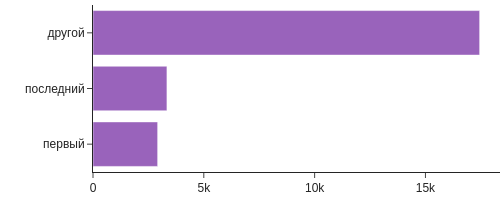

In [14]:
pagri_data_tools.my_info_column(df, 'floor_position')

Создадим новую категориальную переменную из цены

In [ ]:
pagri_data_tools.quantiles_columns(df.last_price)

Max,763 000 000
5,1 870 000
25,3 400 000
50,4 650 000
75,6 800 000
95,15 300 000
Min,12 190


In [15]:
labels = ['эконом', 'комфорт', 'премиум']
bins = [-np.inf, 4_000_000, 10_000_000, np.inf]

In [ ]:
df['price_segment'] = pagri_data_tools.create_category_column(df.last_price, labels=labels, bins=bins).astype('category')

Values,23 699 (100%),,комфорт (50%)
Missing,---,,эконом (38%)
Distinct,3 (<1%),,премиум (11%)
Duplicated origin,23 696 (99.9%),,
Dupl (modify - origin),---,,
Empty,---,,
RAM (Mb),<1 Mb,,

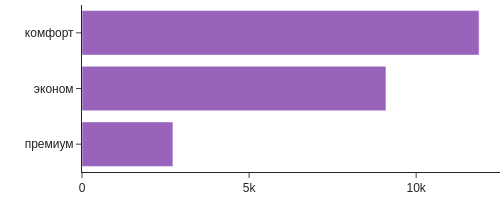

In [17]:
pagri_data_tools.my_info_column(df, 'price_segment')

Создадим переменные день недели, месяц и год публикации объявления.

In [19]:
weekday_dict = {
    'Monday': 'Понедельник',
    'Tuesday': 'Вторник',
    'Wednesday': 'Среда',
    'Thursday': 'Четверг',
    'Friday': 'Пятница',
    'Saturday': 'Суббота',
    'Sunday': 'Воскресенье'
}
month_dict = {
    1: 'Январь',
    2: 'Февраль',
    3: 'Март',
    4: 'Апрель',
    5: 'Май',
    6: 'Июнь',
    7: 'Июль',
    8: 'Август',
    9: 'Сентябрь',
    10: 'Октябрь',
    11: 'Ноябрь',
    12: 'Декабрь'
}

In [20]:
df['publication_weekday'] = df['first_day_exposition'].dt.day_name().map(weekday_dict).astype('category')
df['publication_month'] = df['first_day_exposition'].dt.month.map(month_dict).astype('category')
df['publication_year'] = df['first_day_exposition'].dt.year.astype(str).astype('category')

Values,23 699 (100%),,Четверг (18%)
Missing,---,,Вторник (18%)
Distinct,7 (<1%),,Пятница (17%)
Duplicated origin,23 692 (99.9%),,Среда (17%)
Dupl (modify - origin),---,,Понедельник (15%)
Empty,---,,Суббота (8%)
RAM (Mb),<1 Mb,,Воскресенье (7%)

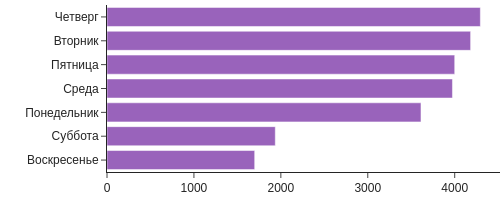

In [21]:
pagri_data_tools.my_info_column(df, 'publication_weekday')

Values,23 699 (100%),,Февраль (11%)
Missing,---,,Март (11%)
Distinct,12 (<1%),,Апрель (10%)
Duplicated origin,23 687 (99.9%),,Ноябрь (10%)
Dupl (modify - origin),---,,Октябрь (9%)
Empty,---,,Сентябрь (8%)
RAM (Mb),<1 Mb,,Июнь (7%)

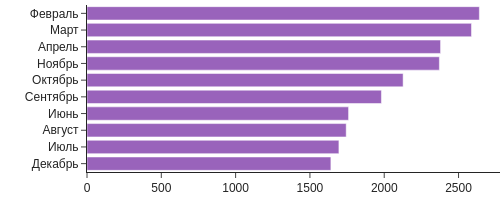

In [22]:
pagri_data_tools.my_info_column(df, 'publication_month')

Values,23 699 (100%),,2018 (36%)
Missing,---,,2017 (35%)
Distinct,6 (<1%),,2019 (12%)
Duplicated origin,23 693 (99.9%),,2016 (12%)
Dupl (modify - origin),---,,2015 (5%)
Empty,---,,2014 <1%
RAM (Mb),<1 Mb,,

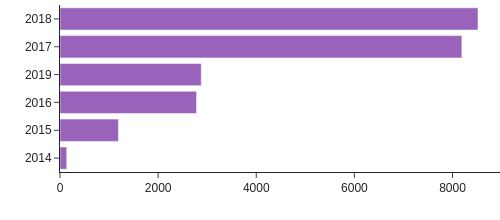

In [23]:
pagri_data_tools.my_info_column(df, 'publication_year')

### Создание новых числовых переменных

Создадим переменную соотношение жилой и общей площади

In [25]:
df['living_total_ratio'] = round(df['living_area'] / df['total_area'],2)

Values,21 796 (92%),,Max,1,,Avg,0.56,,0.56 (4%)
Missing,1 903 (8%),,95%,0.73,,Mode,0.56,,0.55 (4%)
Distinct,91 (<1%),,75%,0.64,,Range,0.98,,0.6 (4%)
Duplicates,23 607 (99.6%),,Median,0.57,,iQR,0.14,,0.62 (4%)
Zeros,---,,25%,0.5,,std,0.11,,0.58 (4%)
Negative,---,,5%,0.39,,kurt,0.23,,0.57 (4%)
RAM (Mb),<1 Mb,,Min,0.02,,skew,-0.14,,0.59 (4%)

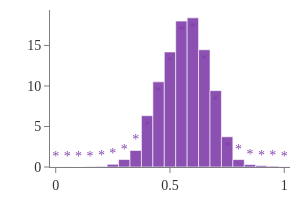

In [26]:
pagri_data_tools.my_info_column(df, 'living_total_ratio')

Создадим переменную отношения площади кухни к общей.

In [28]:
df['kitchen_total_ratio'] = round(df['kitchen_area'] / df['total_area'],2)

Values,21 421 (90%),,Max,0.79,,Avg,0.19,,0.14 (7%)
Missing,2 278 (10%),,95%,0.31,,Mode,0.14,,0.16 (7%)
Distinct,66 (<1%),,75%,0.23,,Range,0.76,,0.12 (7%)
Duplicates,23 632 (99.7%),,Median,0.17,,iQR,0.1,,0.15 (6%)
Zeros,---,,25%,0.13,,std,0.07,,0.13 (6%)
Negative,---,,5%,0.1,,kurt,2.88,,0.11 (6%)
RAM (Mb),<1 Mb,,Min,0.03,,skew,1.23,,0.19 (5%)

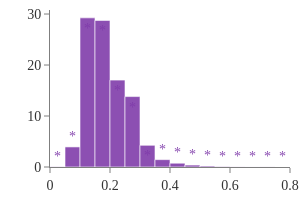

In [29]:
pagri_data_tools.my_info_column(df, 'kitchen_total_ratio')

Создадим переменную цена квадратного метра

In [30]:
df['price_per_sqm'] = (df['last_price'] / df['total_area']).astype(int)

Values,21 421 (90%),,Max,0.79,,Avg,0.19,,0.14 (7%)
Missing,2 278 (10%),,95%,0.31,,Mode,0.14,,0.16 (7%)
Distinct,66 (<1%),,75%,0.23,,Range,0.76,,0.12 (7%)
Duplicates,23 632 (99.7%),,Median,0.17,,iQR,0.1,,0.15 (6%)
Zeros,---,,25%,0.13,,std,0.07,,0.13 (6%)
Negative,---,,5%,0.1,,kurt,2.88,,0.11 (6%)
RAM (Mb),<1 Mb,,Min,0.03,,skew,1.23,,0.19 (5%)

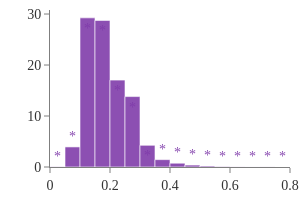

In [31]:
pagri_data_tools.my_info_column(df, 'kitchen_total_ratio')

Создадим новую переменную - расстояние до центра киллометрах.

In [3]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [6]:
df.city_centers_nearest.value_counts()

,count
city_centers_nearest,
8460.0,61
20802.0,32
10720.0,30
20444.0,27
8434.0,27
...,...
16631.0,1
24311.0,1
15782.0,1


In [11]:
df['city_centers_nearest_km'] = round(df.city_centers_nearest / 1000)

## Анализ корреляций между переменными

ВАЖНО  
проверить, что все категориальные переменные по прежнему имеют категориальный тип, чтобы при анализе они не поетрялись

In [ ]:
df.dtypes

### Исследование корреляционных связей

>Топ n значений одного столбца по значениям в другом
>Сделать функцию, чтобы в столбцах, где бльше 20 уникльных значений посмотреть топ n значений по другой колонке.  
>Например, топ 10 покупателей по сумме покупок и прочее.  
>Идея в том, что если  в столбце до 20 уникальных значений, то мы проанализируем комбинации с другими стобцами на графиках.  
>А вот если у нас столбец не числовой и в нем больше 20 уникальных значений, то на графике мы не сможем понять топ n.

>Изучаем топ n значений в категориальных столбцах датафрейма, где значений больше порогового, по значению в столбце value_column.  
>Тут можно делать разные топы, использовать разные функции.  
>Задача изучить то, что мы не сможем изучить на графиках из-за болшого количества занчений в категориальной переменной,  
>поэтому мы берем топ n значений.  

In [ ]:
gen = pagri_data_tools.top_n_values_gen()
next(gen)

>Чтобы сравнить метрики между собой мы можем
- использовать корреляционный анализ (Пирсена, Спирмена, Кенделла)


>`heatmap_corr(df)`

In [ ]:
pagri_data_tools.pagri_data_tools.heatmap_corr(df)

>Использование регрессии и случайного леса для определения влияния переменных  

>Коэффициенты регрессии позволяют оценить влияние каждой переменной на целевую переменную, учитывая влияние других переменных,  
>в то время как важные компоненты в случайном лесе позволяют оценить важность каждой переменной для предсказания целевой переменной.

>Используем регрессиию

>Чтобы построить регрессию и посмотреть стат значимость и коэффициенты удобно использовать модуль statsmodel

>VIF означает Variance Inflation Factor (Фактор инфляции дисперсии). Это статистическая метрика,   
>используемая для обнаружения мультиколлинеарности (сильной корреляции) между предикторами (фичами) в линейной регрессии.

>Обычно, VIF интерпретируется следующим образом:
>
- VIF < 5: слабая мультиколлинеарность
- 5 ≤ VIF < 10: умеренная мультиколлинеарность
- VIF ≥ 10: сильная мультиколлинеарность

>
>Смотрим R2 (коэффициент детерминации)
- использовать коэффициенты у регресси
>Мы строим регрессию и смотрим, у каких метрик больше коэффициенты. Таким образом мы поймем какие метрики сильнее зависят с целевой.  
>Важно, чтобы независимые переменные некоррелировали по отдельности и вместе (мультиколлиниарность).  
>По отдельности смотрим матрицу корреляции.  
>Чтобы определить коррелириуют ли вместе, береме независимые переменные,  
>и перебираем их выбирая одну из них целевой и смотрим R2.  
>Если R2 большой, то значит эта метрика (которая целевая на этом шаге) хорошо описывается другими и ее можно выбросить.
>Также не забываем поправки на гетероскедостичность (HC0, HC1, HC2, HC3) в статпакетах.  
>Нам нужно ответить на следующие вопросы
>    - Влияет ли метрика на целевую?
>    Оцениваем коэффициенты в уравнении регресси у каждой метрики.  
>    - Как влияет метрика на целевую?
>    Смотрим R2 (коэффициент детерминации). И определяем какая часть целевой переменной определяется независимыми метриками.  
>    - Коэффициенты при метриках в уравнении статистически значим? При какаом уровне значимости?
>    Смотрим в стат пакете p value для каждого коэффициента, что нам говорит значим ли этот коэффициент.  
>    То есть мы не просто смотрим его абсолютное значение, а учитываем p value.   
>    - Дайте содержательную интерпретацию коэффицентам?
>    При увеличении метрики k на 1, целевая метрика увеличивается на $b_{k} * 1$
>    То есть нужно перевести коэффициенты в реальное сравнение, насколько увелчисться целевая метрика при изменении определенной метрики на 1
>    - Найдите 95 процентный доверительный интервал.
>    В стат пакете смотрим значение и оно говорит, что если мы многократно повторим ноши вычисления с новыми данными, то 95 процентов наших  
>    полученных коэффицентов будут лежать в этом диапазоне.  

>Строим модель и изучаем результат  
>`linear_regression_with_vif`

In [ ]:
pagri_data_tools.linear_regression_with_vif()

>Испльзовать коэффициенты у классификацию    
>Строим случайный лес какие метрики сильнее всего влияют на решения модели.   
>`plot_feature_importances_classifier`   
>`plot_feature_importances_regression`

>Тут нужно подумать как использовать категориальные переменные тоже   
>Нужно их перевести в one hot encoding или подобное, чтобы также проверить силу их влияния на целевую перменную

In [ ]:
titles_for_axis = dict(
    debt = 'долга'
    , children = 'Кол-во детей'
    , age = 'Возраст'
    , total_income = 'Доход'
)

pagri_data_tools.plot_feature_importances_classifier(df, target='debt', titles_for_axis=titles_for_axis)
pagri_data_tools.plot_feature_importances_regression()

>На основе полученных данных формулируем гипотезы, которые будем проверять в блоке проверки гипотез

> используем быблиотеку `shap`, чтобы определить метрики, которые лучше других помогают предсказывать целевую перемменную

### Промежуточный вывод

## Анализ взаимосвязей переменных на графиках

Если у нас много значений в переменной, то мы агрегируем данные и можем построить бары.  
Но если мы агрегируем данные по переменной, в которой много значений и нам это нужно.   
То мы не сможем построить бары, и тогда мы строим гистограмму. То есть мы берем, например, для каждой заправки считаем среднее время заправки и так как у нас много заправок,  
но мы хотим визуализировать среднее время по ним, и не агрегировать по другому параметру, то мы можем испльзовать гистограмму.  
В данном случае гистограмма своего рода агрегация в бины, то есть мы получаем как бы новую переменную из бинов, в каждом бине будет агрегированы данные.  
Это работает, когда нам нужно просто посмотреть колечество, так как в бинах будет количество. Таким образом мы получаем сколько у нас заправок имеют определенное среднее вермя заправки.  

>Про размер графиков    
>Стандартный размер графиков width=600, height=400  
>Для более сложных графиков, когда  требуется больше места для отображения данных, можно использовать размеры width=800, height=600 или width=1000, height=800

>Сравнивать количество элементов нужно в абсолютных и относительных величинах.  
>Когда мы сравниваем только в абсолютных величинах, мы не учитываем размеры групп.  
>В одной группе может быть элементов больше чем в другой и тогда сравнение будет не совсем точным.   
>Если у нас 2 категориальные переменные, то мы можем сравнивать отностельные величины  
>по одной переменной, а можем по другой.  
>Это как сравнивать суммарный возраст в группах, это не дает полной картины и мы сравниваем средний возраст,  
>чтобы размер группы не влиял.  

>ВАЖНО
>Анализ графиков и выводы для них должны полностью перекрывать постановку задачи и цель.  
>Это значит, что если цель проанализировать зависимость наличия долга, то мы в идеале должны проанализировать  
>влиянеие каждой переменной на наличие долга (числовой и категориальной)  
>Кончено нужно проанализировать все возможные зависимости.  
>Но все зависимости с переменной в постновке задачи мы обязаны проверить и дать выводы. И о наличии и об отсутствие.  
>Важные выводы делаем не только о наличие интересных моментов, но и об отсутствие.  


>Сначала раздел графиков  
>На основе графиков формируются гипотезы (например, у нас у мужчин зп больше)
>И после раздела графиков идет раздел проверки гипотез. Тут мы првоеряем разные гипотезы новые и те, что увидели на графиках.  
>Это правильная последовательность сначала изучили графики и потом на основе их сформировали гипоетзы
>Перед разделом про графики идет раздел с корреляцией и поиском главных компонет случайного леса.  
>Мы выбиарем переменную, для которой мы далее хотим посмотреть разыне зависимости и указываем ее целевой для сучайного леса  
>И смотрим какие фичи сильнее влияют.  
>И теперь можем построить графики с целевой перменно и этими главными фичами и в выводе можно указать про то что это важные компоненты случаного леса

>На основе полученных данных формулируем гипотезы, которые будем проверять в блоке проверки гипотез

### Анализ временных зависимостей

Изучить сезонность.

Когда мы хотим изучить верменную зависимость, то нам нуно создать новые переменные с обрезанными (trunc or round) значениям, чтобы можно было сгруппировать используя groupby or pivot_table  
по этой обрезанной переменной и применить функцию агрегации и построить график, например, среднее время заправки на азс по часам.  
Вот когда мы работаем с временем, нам нужно думать какие переменные создать, обрезая текущее время.  

>Строим когортный анализ, если есть возможность

>Если у нас есть даты, то мы можем посмотреть не просто абсолютные значения на каждую дату какой-то метрики,  
>а посмотреть относительные значения относительно предыдущего значения.  
>Для этого нужно составить таблицу, в которой будет изменение в процентах относительно предыдущего значения.  
>И затем визуализировать для каждой даты динамику этого показателя

### Изучение зависимостей между числовыми переменными

In [ ]:
Построить hexbinplot

>Изучаем scatter plots

In [ ]:
titles_for_axis = dict(
    # numeric column
    children = 'Кол-во детей'
    , age = 'Возраст'
    , total_income = 'Доход'
)

In [ ]:
pagri_data_tools.pairplot(df, titles_for_axis=titles_for_axis, horizontal_spacing=0.12, height=400, width=1200, rows=1, cols=3).show(config=dict(displayModeBar=False, dpi=200), renderer="png")
# если нужно интерактивый график, то
fig = pagri_data_tools.pairplot(df, titles_for_axis=titles_for_axis, horizontal_spacing=0.12, height=800, width=800)
fig.show()

### Изучение зависимостей между категориальными переменными

In [ ]:
gen = pagri_graphs.categorical_graph_analys_gen(df)

In [ ]:
next(gen)

>Строим матрицу тепловой карты для категориальных переменных и изучаем зависимости  
>`categorical_heatmap_matrix_gen`

>Посмотрим на распределение количества элементов между группами

>Нужно подумать как отобразить не только процент от всего количества, но и пороцент в группе  
>То есть у нас есть значение в ячейке, сумма всех, сумма по категории на оси x и сумма по категории на оси Y   
>Вот нужно как-то отобразить процент от суммы, процент от одной категории и от другой категории

In [ ]:
12 (0.5% of total, 20% of row, 15% of col)

>Можно сделать кнопки, чтобы можно было подсветку делать внури колонок и строк  

>Можно сделать кнопки (процент от общего) (процент от тут указывается название оси x) (аналогично для второй оси)

In [ ]:
titles_for_axis = dict(
    # numeric column
    children = ['Количество детей', 'количество детей', 0]
    , age = ['Возраст, лет', 'возраст', 1]
    , total_income = ['Ежемесячный доход', 'ежемесячный доход', 1]
     # category column
    , education = ['Уровень образования', 'уровня образования']
    , family_status = ['Семейное положение', 'семейного положения']
    , gender = ['Пол', 'пола']
    , income_type = ['Тип занятости', 'типа занятости']
    , debt = ['Задолженность', 'задолженности']
    , purpose = ['Цель получения кредита', 'цели получения кредита']
    , has_child = ['Наличие детей', 'наличия детей']
    , age_cat = ['Возрастная категория, лет', 'возрастной категории']
    , total_income_cat = ['Категория дохода', 'категории дохода']
)

In [ ]:
pagri_data_tools.categorical_graph_analys_gen()

>Строим treemap  
>`treemap`   
>`treemap_dash`   
>```
>app = treemap_dash(df)
>if __name__ == '__main__':
>    app.run_server(debug=True)
>```

In [ ]:
pagri_data_tools.treemap()

In [ ]:
app = pagri_data_tools.treemap_dash(df)
if __name__ == '__main__':
    app.run_server(debug=True)

>Строим parallel_categories    
>`parallel_categories `  
>`parallel_categories_dash `  
>```
>app = treemap_dash(df)
>if __name__ == '__main__':
>    app.run_server(debug=True)
>```

In [ ]:
pagri_data_tools.parallel_categories()

In [ ]:
app = pagri_data_tools.parallel_categories_dash(df)
if __name__ == '__main__':
    app.run_server(debug=True)

>Строим Sankey  
>`sankey `   
>`sankey_dash`
>
>```
>app = treemap_dash(df)
>if __name__ == '__main__':
>    app.run_server(debug=True)
>```

In [ ]:
pagri_data_tools.sankey()

In [ ]:
app = pagri_data_tools.sankey_dash(df)
if __name__ == '__main__':
    app.run_server(debug=True)

### Изучение зависимостей между числовыми и категориальными переменными

>Можно добавить кнопку среднее и количество  
>Чтобы можно было посмотртеть распределение по количеству, когда смотрить среднее.  


>```graph_analysis```

In [ ]:
gen = pagri_data_tools.graph_analysis()

>Когда выбрали нужные графики, то стоим их

>Чтобы автоматически генерировались подписи осей и заголовок графика, нужно заполшнить такой словарь.    
>Первый элемент списка - это подпись оси  
>Второй элемент списка - это как это название будет отображаться в заголовке графика  
>Для числовых столбцов также указывается род, чтобы правильно выбрать (Середнее, средний, средняя) (0 - средний род, 1 - мужской род, 2 - женский род)

In [ ]:
f'Среднее / Медианное / Суммарное {numeric} в зависимости от {category} и {category}'

In [ ]:
titles_for_axis = dict(
    # numeric column (0 - средний род, 1 - мужской род, 2 - женский род) (Середнее образовние, средний доход, средняя температура) )
    children = ['Количество детей', 'количество детей', 0]
    , age = ['Возраст, лет', 'возраст', 1]
    , total_income = ['Ежемесячный доход', 'ежемесячный доход', 1]
     # category column
    , education = ['Уровень образования', 'уровня образования']
    , family_status = ['Семейное положение', 'семейного положения']
    , gender = ['Пол', 'пола']
    , income_type = ['Тип занятости', 'типа занятости']
    , debt = ['Задолженность (1 - имеется, 0 - нет)', 'задолженности']
    , purpose = ['Цель получения кредита', 'цели получения кредита']
    , dob_cat = ['Возрастная категория, лет', 'возрастной категории']
    , total_income_cat = ['Категория дохода', 'категории дохода']
)

In [ ]:
summory = []
columns = []

In [ ]:
gen = pagri_data_tools.graph_analysis_gen(df)

>Сначала запускаем код через 1 ячейку `columns = next(gen)`,  
>чтобы появлися график и в `colunns` появились текущие названия колонок  
>Далее пишем наблюдения, если хотим сохранить график и выполняем ячейку ниже.  
>Если сохранять не хотим, то просто выполняем дальше `columns = next(gen)`  

In [ ]:
summory.append(dict(
    columns = columns
    , observations =
'''
**Наблюдения:**
- 21
- Размер больше
- 1
- Сильнее других
-
'''))

In [ ]:
columns = next(gen)

>В `summory` находятся названия колонок и наблюдения для графиков, которые стоит построить

>ВАЖНО  
>После построеня всех графиков и коппирования комментариев из summory  
>Мы в предваретельном выводе после раздела графиков вставляем выводы из summory  
>Чтобы их не собирать  вручную у каждого графика

In [ ]:
def gen_temp():
    for item in summory:
        colunns = item['columns']
        observations = item['observations']
        print(observations)
        yield colunns

In [ ]:
gen = gen_temp()

In [ ]:
colunns = next(gen)


**Наблюдения:**  
- 21
- Размер больше
- 1
- Сильнее других
- 



>Чтобы построить график без category- просто закоментируй  строку с category.

In [ ]:
config = dict(df = df
    , x = colunns[1]
    , y = colunns[0]
    , category = colunns[2]
    # , width = 800
    # , orientation = 'h'
)
pagri_data_tools.bar(config, titles_for_axis)

**Наблюдения:**
-  У мужчин средний доход выше

**Наблюдения:**
-  текст

### Промежуточный вывод

## Формулирование и провера гипотез

### Формулирование гипотез

>На основе проведенного анализа данных сформулирем следующие гипотезы:

>Гипотеза 1: Нет зависимость между наличием детей и возвратом кредита в срок.  
>Гипотеза 2: У мужчин средний доход выше  
>Гипотеза 3: Цель получения кредита не зависит от среднего ежемесяченого доход  
>Гипотеза 4: Средний доход по семейному статусу одинаковый, но у вдовцов отличается  
>Гипотеза 5: У должников в среднем больше детей   
>Гипотеза 6: У должников средний возраст ниже  
>Гипотеза 7: Медианный доход у должников и не должников не  отличается  

>Не забываем что гипотезы можно проверять и между 2 категориальными переменными.  
>Проверять есть ли между ними зависимости.  
>Также если мы на графиках определили, что есть между 2 категориальными перменными связь,  то тут можем это проверить

### Проверка гипотез

>Проверим сформулированные гипотезы.

>_hypothesis_ **Гипотеза 1: Название гипотезы**

>H0: The two categorical variables are independent.    
>H1: The two categorical variables are not independent (i.e., there is a significant association between them).    

>Примеры гипотез
- Есть ли зависимость между наличием детей и возвратом кредита в срок?

>Это будет часто возникать когда у нас категориальная целевая переменная и другие категориальные переменные.  
>И мы хотим проверить влияют ли категориальные переменные на целевую.  
>Например у нас есть поле наличие долга (есть или нет)  
>Вот тут мы можем провести тесты со всеми каетгориями на наличие зависимости с наличием долга.  
>В идеале мы на графиках должны найти гипотезы и тут их проверить.  
>Но если у нас целевая переменная, то мы можем сравнить ее со всеми категориями

In [ ]:
pagri_data_tools.chi2_pearson()

>Формируем словарь для подписей осей и названия гистограм

In [ ]:
titles_for_axis = dict(
    # numeric column
    children = ['Количество детей', 'количества детей']
    , age = ['Возраст', 'возраста']
    , total_income = ['Ежемесячный доход', 'ежемесячного дохода']
)

>Нулевая гипотеза должна быть направлена на отсутствие эффекта, а альтернативная гипотеза должна быть направлена на наличие эффекта.

>Формулируем гипотезу через H0, H1

>H0: У мужчин средний доход не выше, чем у женщин  
>H1: У мужчин средний доход выше, чем у женщин

>Смотрим распределение метрики

In [ ]:
pagri_data_tools.histogram(df.total_income, titles_for_axis)

>Делаем вывод о распределении.    
>Выбираем критерий для проверки гипотезы.  
>Определяем уровнь значимости.

>Проводим тест  
>ВАЖНО  
>df в ttest_ind_df и подобных можно испльзовать только для 2 стороннего случая  
>Для одностороннего нужно придумать как определять какая группа первая по порядку пойдет в тест,  
>в зависимости от постановки гипотезы, так как альтернатива опредляется исходя из порядка аргументов в функции теста

>Если используем ттест или анову, то сначала проводим тест на проверку дисперсии

>H0: У должников и не должников дисперсия не отличается  
>H1: У должников и не должников дисперсия отличается

In [ ]:
pagri_data_tools.levene_df
pagri_data_tools.levene
pagri_data_tools.bartlett_df
pagri_data_tools.bartlett

>Выбираем критерий

In [ ]:
pagri_data_tools.chi2_pearson
pagri_data_tools.ttest_ind_df
pagri_data_tools.ttest_ind
pagri_data_tools.mannwhitneyu_df
pagri_data_tools.mannwhitneyu
pagri_data_tools.proportion_ztest_1sample
pagri_data_tools.proportions_ztest_2sample
pagri_data_tools.proportions_ztest_column_2sample
pagri_data_tools.proportions_chi2
pagri_data_tools.proportions_chi2_column
pagri_data_tools.anova_oneway_df
pagri_data_tools.anova_oneway
pagri_data_tools.tukey_hsd_df
pagri_data_tools.anova_oneway_welch_df
pagri_data_tools.kruskal_df
pagri_data_tools.kruskal
pagri_data_tools.bootstrap_diff_2sample # важно, сохраняем fig и в следующей ячейке делаем fig.shwo(), иначе на google colab работает некорректно

>Проводим тест

>Если отклоняем гипотезу, то строим доверитлеьный интервал

In [ ]:
pagri_data_tools.confint_t_2samples
pagri_data_tools.confint_t_2samples_df
pagri_data_tools.confint_proportion_ztest_2sample
pagri_data_tools.confint_proportion_ztest_column_2sample
pagri_data_tools.confint_proportion_2sample_statsmodels
pagri_data_tools.confint_proportion_coluns_2sample_statsmodels

In [ ]:
titles_for_axis = dict(
    # numeric column
    children = ['Количество детей', 'количества детей']
    , age = ['Возраст', 'возраста']
    , total_income = ['Ежемесячный доход', 'ежемесячного дохода']
)

>Проверим эти гипотезы  


**Гипотеза 1: Нет зависимость между наличием детей и возвратом кредита в срок**

>H0: Наличие детей не влияет на возврат кредита в срок.  
>H1: Наличие детей влияет на возврат кредита в срок.

>Так как у нас обе переменных категориальные, то воспользуемся критерием хи-квадрат Пирсона.  
>Уровень значимости alpha выберем 0.05

In [ ]:
pagri_data_tools.chi2_pearson(df.has_child, df.debt)

Хи-квадрат Пирсона
alpha =  0.05
p-value =  1.724356890544321e-05
Отклоняем нулевую гипотезу, поскольку p-value меньше уровня значимости


**Результат:**  
>На уровне значимости 0.05 гипотеза, что наличие детей не влияет на возврат кредита в срок не подтвердилась.

>Сделать опцию в бутстреп функции, чтобы строился только доверительный интервал

>Также сделать функцию для доверилеьных интервалов для мана уитни через   
>the Hodges-Lehmann estimation, which provides a point estimate and a confidence interval for the difference in medians.

In [ ]:
import pingouin as pg

# Perform the Mann-Whitney U test and calculate the confidence interval
mw_test = pg.mwu(x, y, tail='two-sided', confidence=0.95)

# Print the results
print(mw_test)

In [ ]:
import numpy as np
from scipy import stats

# Perform the Mann-Whitney U test
u_stat, p_value = stats.mannwhitneyu(x, y, alternative='two-sided')

# Calculate the Hodges-Lehmann estimation
hl_est = np.median(np.array([x_i - y_j for x_i in x for y_j in y]))

# Calculate the confidence interval
ci = stats.t.interval(0.95, len(x) + len(y) - 2, loc=hl_est, scale=stats.sem(np.array([x_i - y_j for x_i in x for y_j in y])))

# Print the results
print('Hodges-Lehmann estimation:', hl_est)
print('Confidence interval:', ci)

>Подход следуюищй - мы до раздела проверка гипотез, когда изучаем данные (разделы пропусков, выбросов, дубликатов, зависиместей между перменными и графики),  
>то мы делаем выводы и формируем наблюдеия.  
>Вот эти наблюдения и выводы нужно проверить в проверке гипотез.  
>И потом в основном выводе уже писать не просто, что у нас мужчин больше чем женьшин, а писать, что на уровен значисомти таком то у нас мужчина больше чем  
>женщин с таким то доверительным интервалом.  
>Таким образом выводы по вомзожности должны проходить через этап проверки гипотез, тогда эти выводы становятся более существенными.  

- Гипотезы появляются, когда мы задаем вопросы данным. Мы изучили данные, преобработали и теперь начинаем задавать вопросы.  
- Выдвигаем гипотезу (заметили что-то необычное и хотим проверить), далее формулируем ее и далее проверяем.  
- Не забываем формулировать гипотезы словами. Пишем что является гипотезой H0, а что гипотезой H1  
- Формулируем все гипотезы, которые хотим проверить. Если будет 100 гипотез, то все 100 нужно сформулировать и потом проверить и сделать вывод.  
- Гипотезы могут быть и простыми вопросами без гипотез H0 и H1, такие гипотезы мы проверяем графиками или анализируя таблицу.  
- Восновном, когда мы собиаремся применить стат аппарат для проверки гипотезы, то мы должны записать ее через H0 и H1.  

>Алгоритм проверки статистических гипотез
>
- постановка задачи
>    - Сформулировать, что мы хотим узнать о выборках с точки зрения бизнес задачи (равны ли средние доходы в группах)
>    - перевод бизнес-вопроса на язык статистики: средний доход в группах - проверка равенства средних значений
- формулировка гипотез
>    - формулировка нулевой гипотезы - с т.зр. равенства стат прараметров оцениваемых выборок   
>    (Н0: Средние траты клиентов по группе А равны средним тратам клинентов по группе В)
>    - формулировка альтернативной гипотезы - с точки зрения неравенства параметров  
>    (Н1: Средние траты клиентов по группе А не равны средним тратам клинентов по группе В)
- выбор критерия alpha (почему 0.05 или 0.01)
>    - цена ошибки первого рода (при большой цене ошибки - в мед исследованиях, потенциальном ущербе ) - значение может быть больше, например 0.1
>    - в ежедневных бизнес задачах, обычно - 0.05
- анализ распределения
>    - визуальная оценка
>    - следим за выбросами
>    - проверка гипотез о типе распредеделения (например критерий Шапиро-Уилка)
>    - если распределение не нормальное и размер выборки достаточный (больше 30-50 элементов)  
>    может быть использован t-test именно для проверки гипотезы о равенстве средних.  
>    Согласно ЦПТ (центральная предельная теорема) средние этих выборок будут распределены нормально. См. статью Зотова
- выбор критерия
>    - при оценке равенства средних T-test или Welch T-test (если есть сомнения, то лучше Уэлча)
>        - при рвенстве дисперсий используем обычный т тест
>        - если дисперсии в выборках разные, то используем т теста Уэлча
- получение результата
>    - расчет p-value
- интерпретация p-value
>    - сравнение p-value и alpha
>    - если альфа > p-value - отвергаем нулевую гипотезу
>    - если альфа < p-value - не можем отвергнуть нулевую гипотезу

>Какая у нас задача
- Исследовать взаимосвязь между 2 переменными
>    - обе переменные наминативные
>        - Хи-квадрат Пирсона (не чувствителен к гетероскедастичности) (нормальность не обязательна)
>    - обе переменные количественные
>        - Коэффициент корреляции Пирсона (параметрика) (чувствителен к выбросам) (только непрерывные переменные)
>        - Коэффициент корреляции Спирмена (чувствителен к выбросам) / Кендалла (менее чувствителен к выбросам) (непараметрика) (непрерывные переменные и порядковые категориальные переменные)  
>    - одна переменная номинативная (принимает 2 занчения), вторая количественная
>        - значения
>            - Т-критерий Стьюдента (параметрика) (желательно нормальность) (чувствителен к выбросам) (чувствителен к гетероскедастичности)
>                - если дисперсии равны (тест левена, барлета) и количество в группах равно (тест на равенство пропорций), то используем обычный т тест (эта формула более точно даст результат для этого случая)
>                - если дисперсии не равны (тест левена, барлета) или количество в группах не равно (тест на равенство пропорций), то используем тест Уэлча (эта формула использует больше неопределенности и лучше подходит для этого случая)
>            - U-критерий Манна-Уитни (непараметрика) (нормальность не обязательна) (не чувствителен к гетероскедастичности)
>            Если тестируемая фича полностью сдвигает выборку на некий коэффициент theta или масштабирует выборку на некий параметр theta (theta > 0),  
>            то критерий Манна-Уитни применим
>        - доли
>            - Z тест для долей (параметрика) (желательно нормальность) (чувствителен к выбросам) (чувствителен к гетероскедастичности)
>            - Chi-square тест для долей (непараметрика) (нормальность не обязательна) (не чувствителен к гетероскедастичности)
- Исследовать взаимосвязь между несколькими переменными
>    - Дисперсионный анализ (параметрика) (дисперсии в группах должны быть примерно равны) (желательно нормальность) (чувствителен к выбросам) (чувствителен к гетероскедастичности)
>    - Welch's ANOVA (устройчив к разной дисперсии в группах) (требует более больших размеров групп для точных результатов) (желательно нормальность) (чувствителен к выбросам) (не чувствителен к гетероскедастичности)
>    - Критерий Краскела-Уоллиса (непараметрика) (нормальность не обязательна) (не чувствителен к гетероскедастичности)
>    - Тест Тьюки (если anova или Краскела-Уоллиса нашил различия) (дисперсии в группах должны быть примерно равны) (параметрика) (желательно нормальность) (чувствителен к выбросам) (чувствителен к гетероскедастичности)
- Проверить на равенство дисперсий в группах перед anova
>    - Levene's test (не требует нормальность) (менее чувствительный)
>    - Bartlett's test (требует нормальность) (более чувствительный)

>Отличная статья про доверительные интервалы для разных статистик  
>https://habr.com/ru/articles/807051/

>Bootstrapping

>В бутстрепе, если мы хотим сравнить две выборки, то нельзя смотреть  
>где находится исходная разница средних в бутстрапированной выборке  
>Так как мы берем бутстреп из наших выборок и впролне реально.что наша разность  
>будет близка к с реднему бутстропированной выборки  
>Поэтому p value нужно определять по месту нуля в бутстропированной выборке

>Посмотрим p value для 0 (если различий нет, то разница должна быть 0)
>Для этого посчитаем cdf для + и - среднего, чтобы получить 2 значения cdf
>а теперь возьмем минимум и умножим на 2, так как альт гипотеза у нас.что
>просто не равно 0, значит и справа и слева

In [ ]:
Estimating the power of a non-parametric test using bootstrapping involves simulating the testing process multiple times to estimate the probability of rejecting the null hypothesis. Here's a general outline of the steps:

**Specify the null and alternative hypotheses **: Define the null and alternative hypotheses for your test. For example, the null hypothesis might be that the two groups have the same distribution, and the alternative hypothesis might be that the two groups have different distributions.

Generate simulated data: Generate simulated data that reflects the null hypothesis. For example, you could generate two groups of random data from the same distribution.

Perform the Mann-Whitney U test: Perform the Mann-Whitney U test on the simulated data to obtain a p-value.

Repeat steps 2-3 many times: Repeat steps 2-3 many times (e.g., 1000 times) to generate a distribution of p-values under the null hypothesis.

Estimate the power: Estimate the power of the test by calculating the proportion of times the p-value is below a certain significance level (e.g., 0.05) when the alternative hypothesis is true. To do this, you'll need to generate simulated data that reflects the alternative hypothesis and repeat steps 2-4.

### Промежуточный вывод

## Общий вывод

**Выводы:**

- Долги есть у людей с разным доходом.
- У должников в среднем больше детей.
- У должников среднее количество детей больше у женщин, а у не должников срднее количество детей больше у мужчин
- У должников средний возраст немного ниже для всех категорий семейного положения.
- Медианный доход у должников и не должников практически не отличается
- Должники имеют ниже средний возраст как мужчины так и женщины. Ситуация сохраняется во всех группах дохода.
- Цель получения кредита практически не зависит от среднего ежемесяченого дохода.
- 92 % клиентов не имеют долга.
- Люди от 30 до 50 лет имеют самый высокий средний доход.
- Больше всего кредит берут на цели, связанные с недвижимостью, кроме людей в гражданском браке
- Люди в гражданском браке чаще берут кредит на свадьбу
- Женщины чаще возвращают кредит.
- Анализ значимости признаков для модели случайного леса показал, что доход является самым значимым признаком для предсказания задолженности.
- 58 % клиентов либо женаты, либо замужем. 19 % в гражданском браке. Можно сделать вывод что большинство в браке.  
- Большинство клиентов женщины (66 процентов).
- Только 5 процентов клиентов моложе 25 лет. Основная часть клиентов старше 30 лет.
- Чем меньше количество детей, тем больше значений с высоким доходом.
- Болшая часть женатых имеет доход 100-200 тыс
- На всех уровнях образоания, кроме ученой степени, доход у мужчин выше.
- У мужчин, которые в браке или были в браке, количество детей больше, чем у женщин в той же категории.

**Аномалии и особенности в данных:**
- В датафрейме есть строки дубликаты. 54 строки. Меньше 1 % от всего датафрейма.  
- В столбце с количеством детей есть отрицательные значения. 47 штук. Меньше 1 процента от всего датафрейма. Также есть клиенты с 20 детьми.
- Колонока общий трудовой стаж содержит 74 % отрицаетльных значений. А также максимальное количество дней стажа больше 400 тысяч дней, это больше 1000 лет.
- В колонке возраста 101 нулевое значени.
- Колонка дохода имеет слишком много знаков после запятой.
- В колонке с образованием присутствуют одни и те же знчения с разными регистрами. При этом в колонке с id образования все впрорядке.   

**Результаты предобработки данных:**
- Удалили колонки с id образования и семейного статуса, так как нам для графиков лучше подойдут названия, а не id.
- Колонка со стажем имеет совершенно некорректные данные. Чтобы не внести искажение в анализ, удалим эту колонку.

**Результаты проверки гипотез:**  
- Гипотеза 1: У мужчин средний доход выше, чем у женщин  
> **Результат:** На уровне значимости 0.05 гипотеза подтвердилась.
- Гипотеза 2: Цель получения кредита практически не зависит от среднего ежемесячного дохода  
> **Результат:** На уровне значимости 0.05 у нас нет оснований отвергнуть гипотезу.
- Гипотеза 3: Средний доход по семейному статусу примерно одинаковый, но у вдовцов отличается  
> **Результат:** На уровне значимости 0.05 гипотеза подтвердилась.
- Гипотеза 4: У должников в среднем больше детей  
> **Результат:** На уровне значимости 0.05 гипотеза подтвердилась.   
- Гипотеза 5: У должников средний возраст ниже  
> **Результат:** На уровне значимости 0.05 гипотеза подтвердилась. 95% доверительный интервал для разницы средних возрастов для должников и не должников равен (-inf, -2.74).  
- Гипотеза 6: Медианный доход у должников и не должников не отличается  
> **Результат:** На уровне значимости 0.05 нет оснований отвергнуть гипотезу. 95% доверительный интервал разницы между медианным доходом должников и не должников равен (-2648.05, 179.34).  
- Гипотеза 7: Наличие детей не влияет на возврат кредита в срок  
> **Результат:** На уровне значимости 0.05 гипотеза не подтвердилась.

**Рекомендации:**
- Добавить контроль данных, чтобы не дублировались значения с разными регистрами в колонке с образованием.
- Добавить уникальный идентификатор клиента, чтобы избежать дублирования строк.
- Добавить проверку на отрицательные значения и на слишком болшьшие значения в количестве детей при загрузке данных.
- Выяснить откуда возникают отрицательные значения в трудовом стаже и добавить контроль ввода невалидных данных.
- Выяснить причину нулевых значений в колонке возраста и добавить проверку на нулевые значения при загрузке данных.
- Выяснить причину большого количества знаков после запятой в колонке дохода.

>Что нужно сообщить в выводе
- информацию о том, что удалось подтвердить гипотезы (тут пишем только те, которые удалось подтвердить)
- всю информацию о датасете, которые важны. Дубликаты, которые несут практическую пользу и рекомендации по ним, пропуски также с рекомендациями  
>и остальные моменты по данным и рекомендации. Тут важно указывать именно найденные аномалии, которые имеют практическую пользу, которые нужно исправить и прочее.  
>Пишем, что были найдены выбросы, они были связаны возможно с тем то и тем то.
- и в конце обязательно call to action
>написать что необходимо сделать с этими результатами

>Советы по оформлению общего выывод
- не нужно вставлять таблицы и графики в вывод.
>В выводе пишем словами самое важное и практически полезное, что мы получили, причем в порядке убывания важности.  
>И когда мы пишем, что увидели то-то, то приводим гиперссылку на график или результат ячейки, где это получено.  
>Так будет компактный вывод и при необходимости человек сможет быстро перейти и посмотреть график или таблицу  

**Удалось подтвердить гипотезу** о влиянии различных характеристик клиента на факт погашения кредита в срок. Каждый из рассмотренных параметров оказывает влияние на надёжность заёмщика. Рассмотренные факторы по-разному влияют на надёжность заёмщиков. Например, семейное положение оказалось более значимым фактором, чем уровень дохода.


- В ходе анализа исходного набора данных было проведено (были устранены пропуски в двух колонках с числовыми значениями - 'total_income' и 'days_employed').  
- После __устранения явных и скрытых дупликатов__ и удаления оставшихся после обогащения пропусков объем датасета сократился на 0.05%
- Были устранены __выбросы__ в колонках 'days_employed' и 'children': в первом случае выбросы возникли в результате системной ошибки (данные были внесены в часах, а не в днях); во втором случае ошибка, вероятнее всего была допущена людьми, вносившими данные в систему
- ...

**Необходимо**

>1. Запросить в отделе по работе с клиентами информацию о возможности брать кредит без подтверждения дохода.
>
>2. Сообщить коллегам, занимающимся выгрузкой о наличие дубликатов, если вопрос не разрешится, запросить индентификационный номер клиента к датасету.
>
>3. Прописать в задаче на поставку данных формат данных (пол только F и M, положительные значения). Приложить информацию о найденных аномалиях.

**Сначала проверяем орфографические ошибки**

In [ ]:
pagri_data_tools.correct_notebook_text()

**Затем создаем номера у глав и оглавление**

>Чтобы добавить номера глав и ссылки для оглавления и сделать оглавлнеие  
>оглавление добавиться в начало ноутбука

>Сначала можно в режиме `draft` сделать пробный варант, проверить и потом уже запустить в режиме `final`

In [ ]:
pagri_data_tools.make_headers_link_and_toc()

**Далее создаем ссыки на выводы и аномалии**

>Чтобы было удобно искать где вставить якорь для ссылки, названия выводов и аномалий должно точно совпадать   
>в итоговом списке аномалий и выводов и в тех местах (то есть в наблюдениях под ячейками), куда мы будем помещать ссылки

>Чтобы сделать ссылки на выводы и аномалии, нужно  
>в тех местах, куда хотим переходить по ссылке вставить текст выводов или аномалий (берем прямо из основных выводов)  
>выводы должны начинаться с `_conclusion_`  
>аномалии  должны начинаться с `_anomaly_`  
>Примеры:  
>    

In [ ]:
_anomalies_ В столбце с количеством детей есть отрицательные значения. 47 штук.

>Можно в одной ячейке и выводы и аномалии, с обеих ссылок будет переходить сюда, но назад будет возвращаться только в одно место,    
>в то, которое было первым в ячейке

In [ ]:
_conclusion_ Только 5 процентов клиентов моложе 25 лет. Основная часть клиентов старше 30 лет.
_anomalies_ В колонке возраста 101 нулевое значени.

>Содеражние выводов и аномалий появится в начале ноутбука  
>также 2 режима `draft` и `final`

>Подумать как сделать удобнее создание выводов  
>Пока лучше сначала взять выводы из наблюдений и выбрать из них  наиболее важные и интересные, не меняя их.  
>Далее берем этот список и поиском находим ячейку с этим выводом и перед графиком помещаем  
>_conclusion_ и сам вывод  

>Чтобы был нужный порядок в списке выводов и аномалий в начале отчета, нужно передвать словарь со списками выводов и аномалий.  
>Переменная order принимает словарь, где ключи `onclusions` и `anomalies`, а значения это соответствующие списки  

>Примеры списков

In [ ]:
order = dict(
            conclusions =[ 'Женщины чаще возвращают кредит, чем мужчины.']
            , anomalies = ['В датафрейме есть строки дубликаты. 54 строки. Меньше 1 % от всего датафрейма.  ']
)

In [ ]:
pagri_data_tools.add_conclusions_and_anomalies()

**Если сильно нужно, создаем ссыки на гипотезы**

>В главе гипотез для каждой гипоетзы, куда будем переходить из оглавления, в начале перед гипотезой ставим _hypothesis_ и пробел

In [ ]:
_hypothesis_ **Гипотеза 1: Название гипотезы**

>Выполняем следующую функцию и в начале отчета появится список гипотез с ссылками  
>Далее нужно добавить результат гипотез вручную

In [ ]:
pagri_data_tools.add_hypotheses_links_and_toc()

**Финальное размещение ноутбука на git hub с ссылкой на google colab**  

>Комитим на гит хаб финальную версию ноутбука.  
>Создаем на гит хаб readme файл проекта, в котором в начале идет ссылка на google colab  
>Далее ее открываем и переходим на google colab  
>Выполняем все ячейки, смотрим все ли правильно отобразилось.  
>Далее в меню File выбираем сохранить копию на гит хаб.  
>Не меняем имя, тогда все содержимое ноутбука сохраниться на гит хаб.  